In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
#from Pillow import Image

img_input= cv2.imread('shadow3.jpg')# reads the rbg image
ycbcr_img=cv2.cvtColor(img_input, cv2.COLOR_BGR2YCrCb) # converts the rgb image to ycbcr color space

bin_mask = np.copy(ycbcr_img) #generates a numpy array which will be the binary mask to differentiate shadow and non shadow regions later
print(bin_mask.shape)

(425, 640, 3)


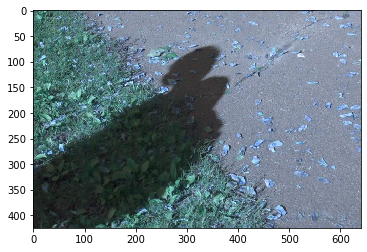

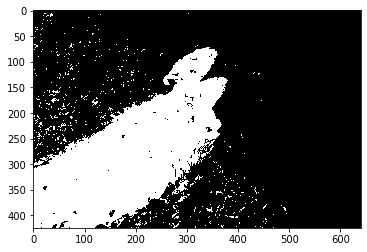

In [4]:
y_mean = np.mean(cv2.split(ycbcr_img)[0]) # computes the mean of Y channel

y_std = np.std(cv2.split(ycbcr_img)[0]) #computes the standard deviation of Y channel

for i in range(ycbcr_img.shape[0]):
    for j in range(ycbcr_img.shape[1]):

        if ycbcr_img[i, j, 0] < y_mean - y_std:
            bin_mask[i, j] = [255, 255, 255] #pixel is coloured white
        else:
            bin_mask[i, j] = [0, 0, 0] #pixel is coloured black
            
imgg = deepcopy(img_input)
for i in range(bin_mask.shape[0]):
    for j in range(bin_mask.shape[1]):

        if (bin_mask[i, j,0]== 255 and bin_mask[i, j,1]== 255 and bin_mask[i, j,2]== 255):
            imgg[i, j] = [255, 255, 255] #pixel is coloured white
        else:
            imgg[i, j] = [0, 0, 0] #pixel is coloured black

plt.imshow(img_input)
plt.show()
plt.imshow(imgg)
plt.show()
